# Area of the Mandelbrot set


### 0 Init


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

### 1 Mandelbrot

In [5]:
def mandel_number(x, y, max_iter):
    ''' Returns the number of iterations needed for the Mandelbrot map to get out of scope '''
    a1, b1 = 0, 0
    for f in range(max_iter):
        if (a1 * a1 + b1 * b1) >= 4:
            return f
        a, b = a1 * a1 - b1 * b1 + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return max_iter

def colors(x, y, max_iter=100):
    ''' Calculates colors based on the number of iterations'''
    mandel_num = mandel_number(x, y, max_iter)
    if mandel_num < 10:
        g = mandel_num / 10
        return (0.2,  0, 0.9*g)  
    else:
        g = mandel_num / 100
        return (0.2, 0, 0.9*g)


def mandelbrot_image(s=500, xrange=(-2, 1.5), yrange=(-1.5, 1.5)):
    ''' Creates an image of the Mandelbrot set'''
    # Empty array voor x,y coordinated with colors
    img = np.zeros((s, s, 3))
    
    x_vals = np.linspace(xrange[0], xrange[1], s)
    y_vals = np.linspace(yrange[0], yrange[1], s)
    
    # Loop over each pixel and color it based on the Mandelbrot numbers
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            img[j, i] = colors(x, y)  

    # Toon de afbeelding
    plt.imshow(img, extent=(xrange[0], xrange[1], yrange[0], yrange[1]))
    plt.title("Mandelbrot Set Visualization")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.tight_layout()
    plt.show()



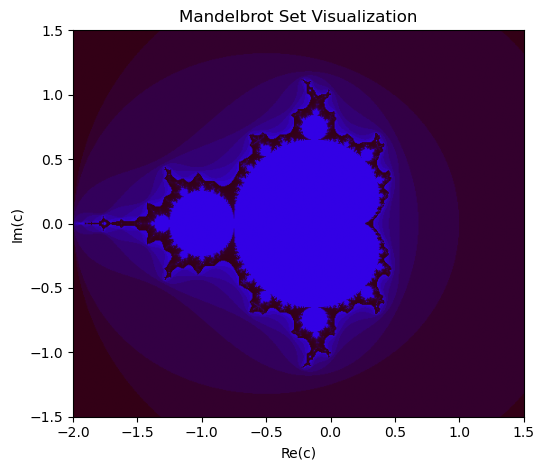

In [6]:
mandelbrot_image()

### 2 Monte Carlo

In [46]:
def inset(x,y, max_iter):
    ''' Determine if a complex number is part of the Mandelbrot set'''
    mandel_num = mandel_number(x, y, max_iter)
    if mandel_num >= max_iter:
        return True
    else:
        return False
    
def monte_carlo(samples = 2000000, max_iter=100 ,xrange=(-2, 1.5), yrange=(-1.5, 1.5), plot = True ):
    ''' Approach the surface area of the Mandelbrot set by the Monte Carlo method'''
    x_min, x_max = xrange
    y_min, y_max = yrange
    region_area = (x_max - x_min) * (y_max - y_min)
    
    x_points = []
    y_points = []
    
    area_count = 0
    for i in range(samples):
        x = random.uniform(x_min,x_max)
        y = random.uniform(y_min,y_max)
        if inset(x, y, max_iter):
            area_count += 1
            x_points.append(x)
            y_points.append(y)

    # Estimate the area of the Mandelbrot set
    mandel_area = (area_count/samples) * region_area
    
    if plot: 
        # Plot the random points that are in the set
        plt.scatter(x_points, y_points, color="blue", s=0.1, label="Inside Mandelbrot")
        plt.xlabel("Re(c)")
        plt.ylabel("Im(c)")
        plt.title("Monte Carlo Sampling of the Mandelbrot Set")
        plt.xlim(-2, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.axis("equal")
        plt.show()
    
    return mandel_area

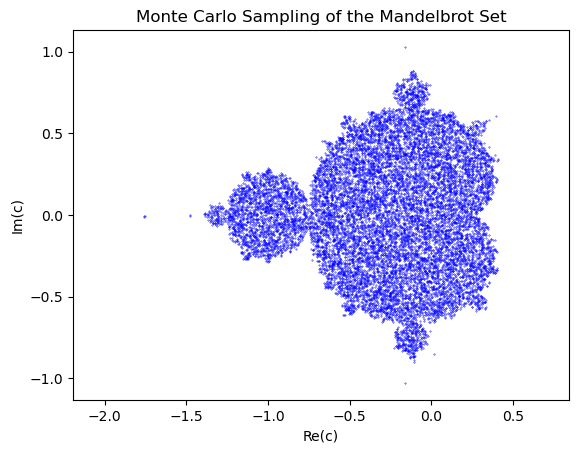

1.54644

In [86]:
monte_carlo(samples = 100000)

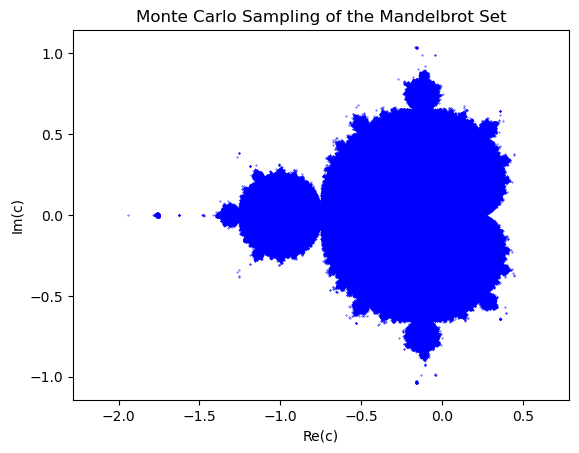

1.5519314999999998

In [85]:
monte_carlo()

In [68]:
mc = [0,0,0,0]
for i in range(4):
    mc[i] = monte_carlo(samples = 10000000, max_iter = 300, plot = False)

print(mc)
print(np.average(mc))

[1.51946445, 1.5185247000000002, 1.5171345, 1.51860345]
1.5184317750000003


In [69]:
mc = [0,0,0,0]
for i in range(4):
    mc[i] = monte_carlo(samples = 10000000, max_iter = 500, plot = False)

print(mc)
print(np.average(mc))

[1.5156372000000002, 1.51583355, 1.5137482500000001, 1.5137209500000002]
1.5147349875000002


Text(0.5, 1.0, 'Error in Monte Carlo estimate of Mandelbrot area')

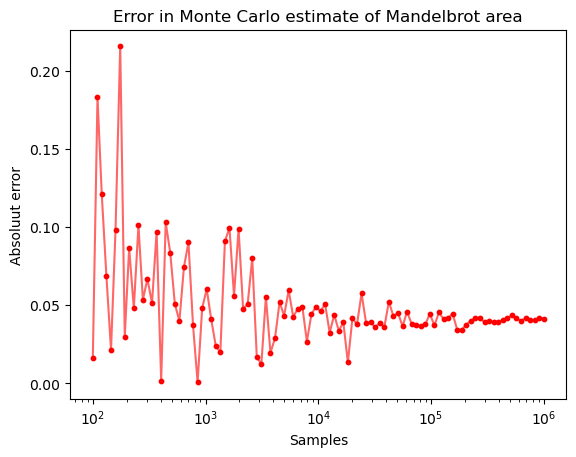

In [87]:
n = 6  # Number of values for j
k = 20 # Iterations per j value
j_list = [10**i for i in range(2, n+1)]
log_points = np.logspace(2, n, num=100)
j_list = np.unique(np.round(log_points).astype(int))


results_all = np.zeros((len(j_list),k))

for l,j in enumerate(j_list):
    result = np.zeros(k)
    for i in range(k):
        result[i] =  monte_carlo(samples = j, plot = False)
    results_all[l] = result

A_true = 1.506484

error = np.zeros(len((j_list)))
for i,res in enumerate(results_all):
    error[i] = np.abs(A_true - np.average(res))

plt.scatter(j_list, errors, s=10, color = 'red', label="Error")
plt.plot(j_list, errors, color = 'red',  alpha = 0.6 ,label="Error Trend")
plt.xscale('log')
plt.xlabel("Samples")
plt.ylabel("Absoluut error")
plt.title("Error in Monte Carlo estimate of Mandelbrot area")

